### Background

Pernalonga, a leading supermarket chain of over 400 stores in Lunitunia, sells over 10 thousand products in over 400 categories.  Pernalonga regularly partners with suppliers to fund promotions and derives about 30% of its sales on promotions.  While a majority of its promotion activities are in-store promotions, it recently started partnering with select suppliers to experiment on personalized promotions.  In theory, personalized promotions are more efficient as offers are only made to targeted individuals who required an offer to purchase a product.  In contrast, most in-store promotions make temporary price reductions on a product available to all customers whether or not a customer needs the incentive to purchase the product.  The efficiency of personalized promotion comes from an additional analysis required on customer transaction data to determine which customers are most likely to purchase a product to be offered in order to maximize the opportunity for incremental sales and profits.

### Problem

Your analytics consulting firm is being considered by Pernalonga (the client) to develop a marketing campaign to experiment on personalized promotions.  While the details of specific partnerships with suppliers to fund the experimental personalized promotions are still being negotiated, you have started to receive data from the client.  You have two weeks to analyze and understand the data and report back initial insights to the client.  In order to be selected as the sole-developer of the marketing campaign, your team needs to demonstrate that you know the data very well, i.e., you need to show the client that you know the profiles of their stores, products and customers better than they do and are ready to take on the task of developing the marketing campaign. 

From the client’s point of view, they need to be confident that you know the answers to the following key questions:

   * Who are the best customers in terms of revenues, profits, transactions/store visits, number of products, etc.?
   * What are the products and product groups with the best volumes, revenues, profits, transactions, customers, etc.?
   * Which stores rank the highest in volumes, revenues, profits, transactions, customers, etc.?
   * Are there interesting groupings of customers, e.g., most valuable (buy everything at any price) or cherry-pickers (buy mostly on promotions), defined by certain categories (buy baby products or never buy milk), etc.?
   * Other than product categories and sub-categories, are there other product groupings, e.g., Key Value Items (KVI) and Key Value Categories (KVC), traffic drivers, always promoted versus seldom/never promoted, etc.?
   * Are there natural groupings of stores, e.g., stores frequented by cherry-pickers versus stores visited by most loyal customers?


### Available Data

##### transaction_table.csv - contains transaction history in 2016 and 2017 for close to 8,000 customers


   * cust_id – Customer ID
   * tran_id – Transaction ID
   * tran_dt – Transaction Date
   * store_id – Store ID
   * prod_id – Product ID
   * prod_unit – Product unit of measure: CT for count and KG for kilograms
   * prod_unit_price – Unit price of the product
   * tran_prod_sale_qty – Quantity/units of the product in the transaction
   * tran_prod_sale_amt – Sales amount for the product before discounts in the transaction
   * tran_prod_discount_amt – Total amount of discounts applied to the product in the transaction
   * tran_prod_offer_cts – Total number of offers on the product resulting in the total amount of discounts in the transaction
   * tran_prod_paid_amt – Amount paid for the product after discounts are applied in the transaction

##### product_table.csv - contains the product to subcategory and category mapping and descriptions for about 11,000 products 


   * prod_id – Product ID
   * subcategory_id – Subcategory ID
   * category_id – Category ID
   * sub_category_desc – Subcategory name (in Portuguese)
   * category_desc – Category name (in Portuguese)
   * category_desc_eng – Category name (in English)
   * brand_desc – Brand of the product, including NO LABEL and PRIVATE LABEL


# PRODUCT - EXPLORATORY DATA ANALYSIS

In [1]:
# Import libraries

# To write a Python 2/3 compatible codebase, the first step is to add this line to the top of each module
from __future__ import division, print_function, unicode_literals

import pandas as pd
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#import pandas_profiling
import os, sys

import datetime

In [2]:
# set # of columns and rows to display

pd.set_option('max_columns', None)
pd.set_option('max_rows', 50)

In [3]:
# Import transaction table

transactions = pd.read_csv('transaction_table.csv')

transactions.head()

,cust_id,tran_id,tran_dt,store_id,prod_id,prod_unit,tran_prod_sale_amt,tran_prod_sale_qty,tran_prod_discount_amt,tran_prod_offer_cts,tran_prod_paid_amt,prod_unit_price
0,139662,2.017110e+18,2017-11-03,584,145519008,CT,2.89,4.0,0.00,0,2.89,0.7225
1,799924,2.017111e+18,2017-11-12,349,145519008,CT,2.89,4.0,-1.45,1,1.44,0.7225
2,1399898,2.017102e+18,2017-10-21,684,145519008,CT,2.89,4.0,-1.45,1,1.44,0.7225
3,1399898,2.017111e+18,2017-11-11,684,145519008,CT,2.89,4.0,-1.45,1,1.44,0.7225
4,1399898,2.017121e+18,2017-12-05,684,145519008,CT,2.89,4.0,-1.45,1,1.44,0.7225


In [4]:
# Transactions shape

transactions.shape

(29617585, 12)

In [5]:
# Transactions data types

transactions.dtypes

cust_id                     int64
tran_id                   float64
tran_dt                    object
store_id                    int64
prod_id                     int64
prod_unit                  object
tran_prod_sale_amt        float64
tran_prod_sale_qty        float64
tran_prod_discount_amt    float64
tran_prod_offer_cts         int64
tran_prod_paid_amt        float64
prod_unit_price           float64
dtype: object

In [6]:
# Transactions descriptive statistics

transactions.describe().T

,count,mean,std,min,25%,50%,75%,max
cust_id,29617585.0,5.016900e+07,2.904564e+07,2.956800e+04,2.500986e+07,5.025960e+07,7.568990e+07,9.999978e+07
tran_id,29617585.0,2.016584e+18,4.993258e+14,2.016010e+18,2.016072e+18,2.017011e+18,2.017070e+18,2.017123e+18
store_id,29617585.0,4.457788e+02,2.004097e+02,1.020000e+02,2.940000e+02,3.930000e+02,5.880000e+02,9.990000e+02
prod_id,29617585.0,9.797496e+08,1.192139e+08,1.455190e+08,9.992470e+08,9.993624e+08,9.996799e+08,9.999997e+08
tran_prod_sale_amt,29617585.0,2.503286e+00,4.130594e+00,1.000000e-02,9.000000e-01,1.590000e+00,2.790000e+00,3.371250e+03
tran_prod_sale_qty,29617585.0,1.667866e+00,2.279535e+00,1.000000e-03,1.000000e+00,1.000000e+00,2.000000e+00,2.112000e+03
tran_prod_discount_amt,29617585.0,-4.027838e-01,1.558037e+00,-1.400250e+03,-2.400000e-01,0.000000e+00,0.000000e+00,0.000000e+00
tran_prod_offer_cts,29617585.0,3.408940e-01,5.339727e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,7.600000e+01
tran_prod_paid_amt,29617585.0,2.100502e+00,3.162718e+00,-1.410000e+00,8.400000e-01,1.370000e+00,2.320000e+00,1.971000e+03
prod_unit_price,29617585.0,2.093038e+00,2.587080e+00,7.500000e-03,7.400000e-01,1.390000e+00,2.490000e+00,3.990000e+02


In [7]:
# Is there any amount paid for the product (after discounts) less than 0 ?

(transactions['tran_prod_paid_amt'] < 0).any()

True

In [8]:
# Filter out transactions less than 0

transactions.drop(transactions[transactions['tran_prod_paid_amt'] < 0].index, inplace = True)

In [9]:
# Transactions shape

transactions.shape

(29617577, 12)

In [10]:
# Checking potential errors in number of discounts

transactions["tran_prod_offer_cts"].value_counts()

0     20364070
1      8451995
2       766077
3        30327
4         4706
5          189
6          156
8           18
7           14
10           8
9            7
12           2
13           2
14           1
16           1
18           1
20           1
30           1
76           1
Name: tran_prod_offer_cts, dtype: int64

In [11]:
# More than 4 offers on the product

(transactions['tran_prod_offer_cts'] > 4).any()

True

In [12]:
# Individually screening whether the high numbers of discounts are error

transactions[transactions['tran_prod_offer_cts'] == 1].describe()

,cust_id,tran_id,store_id,prod_id,tran_prod_sale_amt,tran_prod_sale_qty,tran_prod_discount_amt,tran_prod_offer_cts,tran_prod_paid_amt,prod_unit_price
count,8.451995e+06,8.451995e+06,8.451995e+06,8.451995e+06,8.451995e+06,8.451995e+06,8.451995e+06,8451995.0,8.451995e+06,8.451995e+06
mean,5.023613e+07,2.016533e+18,4.455133e+02,9.620627e+08,3.279136e+00,1.737134e+00,-1.198136e+00,1.0,2.081000e+00,2.445389e+00
std,2.905973e+07,5.028834e+14,1.994563e+02,1.626511e+08,4.861358e+00,2.271857e+00,2.151179e+00,0.0,3.017969e+00,3.015256e+00
min,2.956800e+04,2.016010e+18,1.370000e+02,1.455190e+08,1.000000e-02,2.000000e-03,-5.850000e+02,1.0,0.000000e+00,4.944444e-02
25%,2.506982e+07,2.016063e+18,3.030000e+02,9.992378e+08,1.290000e+00,1.000000e+00,-1.300000e+00,1.0,8.900000e-01,9.898214e-01
50%,5.038983e+07,2.016121e+18,3.880000e+02,9.993471e+08,2.000000e+00,1.000000e+00,-6.700000e-01,1.0,1.380000e+00,1.690000e+00
75%,7.570960e+07,2.017080e+18,5.880000e+02,9.996497e+08,3.580000e+00,2.000000e+00,-2.900000e-01,1.0,2.240000e+00,2.790000e+00
max,9.999978e+07,2.017123e+18,9.990000e+02,9.999997e+08,1.166100e+03,7.200000e+02,0.000000e+00,1.0,8.640000e+02,3.990000e+02


In [13]:
transactions[transactions['tran_prod_offer_cts'] == 2].describe()

,cust_id,tran_id,store_id,prod_id,tran_prod_sale_amt,tran_prod_sale_qty,tran_prod_discount_amt,tran_prod_offer_cts,tran_prod_paid_amt,prod_unit_price
count,7.660770e+05,7.660770e+05,766077.000000,7.660770e+05,766077.000000,766077.000000,766077.000000,766077.0,766077.000000,766077.000000
mean,5.008108e+07,2.016622e+18,428.054890,9.530078e+08,4.910995,2.085320,-2.157011,2.0,2.753984,3.189478
std,2.906043e+07,4.977442e+14,182.010254,1.810934e+08,9.139091,4.651372,4.228822,0.0,5.329454,4.602114
min,2.956800e+04,2.016010e+18,137.000000,1.455190e+08,0.020000,0.006000,-559.680000,2.0,0.000000,0.049444
25%,2.452972e+07,2.016100e+18,304.000000,9.992303e+08,1.590000,1.000000,-2.200000,2.0,0.960000,0.990000
50%,5.012994e+07,2.017022e+18,362.000000,9.993094e+08,2.690000,1.000000,-1.100000,2.0,1.560000,1.980000
75%,7.563963e+07,2.017083e+18,575.000000,9.995454e+08,4.990000,2.000000,-0.530000,2.0,2.840000,3.490000
max,9.999978e+07,2.017123e+18,999.000000,9.999992e+08,1314.720000,2112.000000,0.000000,2.0,755.040000,399.000000


In [14]:
transactions[transactions['tran_prod_offer_cts'] == 3].describe()

,cust_id,tran_id,store_id,prod_id,tran_prod_sale_amt,tran_prod_sale_qty,tran_prod_discount_amt,tran_prod_offer_cts,tran_prod_paid_amt,prod_unit_price
count,3.032700e+04,3.032700e+04,30327.000000,3.032700e+04,30327.000000,30327.000000,30327.000000,30327.0,30327.000000,30327.000000
mean,4.992584e+07,2.016828e+18,415.941933,9.676086e+08,7.889127,2.533450,-3.581054,3.0,4.308073,4.374162
std,2.904563e+07,4.463604e+14,166.616718,1.534534e+08,17.986815,5.685341,7.296938,0.0,11.407751,5.152979
min,2.956800e+04,2.016010e+18,137.000000,1.525760e+08,0.110000,0.060000,-324.800000,3.0,0.000000,0.079000
25%,2.364976e+07,2.016122e+18,310.000000,9.992313e+08,1.990000,1.000000,-3.720000,3.0,1.100000,1.150000
50%,5.003995e+07,2.017082e+18,347.000000,9.993498e+08,3.780000,1.000000,-1.600000,3.0,1.950000,2.190000
75%,7.568495e+07,2.017122e+18,561.000000,9.996265e+08,7.990000,3.000000,-0.740000,3.0,4.090000,5.488982
max,9.999978e+07,2.017123e+18,999.000000,9.999992e+08,674.550000,450.000000,-0.010000,3.0,459.650000,89.900000


In [15]:
transactions[transactions['tran_prod_offer_cts'] == 4].describe()

,cust_id,tran_id,store_id,prod_id,tran_prod_sale_amt,tran_prod_sale_qty,tran_prod_discount_amt,tran_prod_offer_cts,tran_prod_paid_amt,prod_unit_price
count,4.706000e+03,4.706000e+03,4706.000000,4.706000e+03,4706.000000,4706.000000,4706.000000,4706.0,4706.000000,4706.000000
mean,5.052354e+07,2.016491e+18,425.311305,9.695883e+08,14.002890,4.525606,-6.065852,4.0,7.937038,3.856950
std,2.903737e+07,4.832187e+14,181.413809,1.447050e+08,33.036649,7.659172,13.342729,0.0,20.840821,4.992215
min,3.977400e+04,2.016010e+18,137.000000,1.525760e+08,0.280000,0.166000,-302.940000,4.0,0.000000,0.079000
25%,2.427989e+07,2.016092e+18,303.000000,9.992349e+08,3.160000,2.000000,-5.640000,4.0,1.960000,0.890000
50%,5.076972e+07,2.016113e+18,353.000000,9.993284e+08,5.800000,2.000000,-2.460000,4.0,3.195000,1.990000
75%,7.631957e+07,2.017071e+18,572.000000,9.995469e+08,11.980000,4.000000,-1.020000,4.0,6.780000,3.990404
max,9.995981e+07,2.017123e+18,999.000000,9.999992e+08,484.380000,240.000000,-0.020000,4.0,305.660000,89.900000


In [16]:
transactions[transactions['tran_prod_offer_cts'] == 5].describe()

,cust_id,tran_id,store_id,prod_id,tran_prod_sale_amt,tran_prod_sale_qty,tran_prod_discount_amt,tran_prod_offer_cts,tran_prod_paid_amt,prod_unit_price
count,1.890000e+02,1.890000e+02,189.000000,1.890000e+02,189.000000,189.000000,189.000000,189.0,189.000000,189.000000
mean,5.064420e+07,2.016588e+18,423.677249,9.738502e+08,38.884656,11.585021,-14.416720,5.0,24.467937,4.007382
std,2.963801e+07,4.932579e+14,158.659969,1.327157e+08,93.161257,44.655027,32.661957,0.0,61.203388,4.468830
min,1.129755e+06,2.016011e+18,150.000000,1.806110e+08,1.160000,0.966000,-175.000000,5.0,0.740000,0.160000
25%,2.741962e+07,2.016093e+18,321.000000,9.992694e+08,3.600000,2.462000,-8.840000,5.0,2.750000,0.600000
50%,5.012994e+07,2.017011e+18,365.000000,9.995324e+08,7.960000,5.000000,-3.670000,5.0,4.270000,1.960000
75%,7.631991e+07,2.017080e+18,557.000000,9.997465e+08,19.670000,7.000000,-0.610000,5.0,11.360000,5.850000
max,9.960000e+07,2.017123e+18,986.000000,9.999869e+08,459.440000,600.000000,-0.250000,5.0,292.220000,19.990000


In [17]:
transactions[transactions['tran_prod_offer_cts'] == 6].describe()

,cust_id,tran_id,store_id,prod_id,tran_prod_sale_amt,tran_prod_sale_qty,tran_prod_discount_amt,tran_prod_offer_cts,tran_prod_paid_amt,prod_unit_price
count,1.560000e+02,1.560000e+02,156.000000,1.560000e+02,156.000000,156.000000,156.000000,156.0,156.000000,156.000000
mean,4.632069e+07,2.016500e+18,458.493590,9.596576e+08,31.380385,7.491410,-13.626474,6.0,17.753910,5.081309
std,2.756065e+07,4.862197e+14,188.609735,1.721638e+08,68.688221,9.090859,26.264291,0.0,43.715449,5.851404
min,2.997490e+05,2.016010e+18,143.000000,1.527610e+08,0.560000,0.710000,-210.000000,6.0,0.320000,0.160000
25%,2.529998e+07,2.016101e+18,332.750000,9.992287e+08,4.745000,2.027000,-13.200000,6.0,3.300000,0.990000
50%,4.203986e+07,2.016112e+18,475.000000,9.992702e+08,10.765000,4.000000,-5.040000,6.0,5.145000,2.590000
75%,6.440970e+07,2.017071e+18,588.000000,9.996354e+08,30.325000,8.000000,-1.690000,6.0,14.512500,7.065000
max,9.910978e+07,2.017122e+18,996.000000,9.999590e+08,599.400000,60.000000,-0.240000,6.0,389.400000,27.990000


In [18]:
transactions[transactions['tran_prod_offer_cts'] == 7].describe()

,cust_id,tran_id,store_id,prod_id,tran_prod_sale_amt,tran_prod_sale_qty,tran_prod_discount_amt,tran_prod_offer_cts,tran_prod_paid_amt,prod_unit_price
count,1.400000e+01,1.400000e+01,14.000000,1.400000e+01,14.000000,14.000000,14.00000,14.0,14.000000,14.000000
mean,4.901474e+07,2.016572e+18,425.357143,9.995536e+08,54.418571,11.571429,-19.30500,7.0,35.113571,2.352857
std,3.221396e+07,4.973117e+14,136.200422,2.380817e+05,165.782572,17.028096,55.40039,0.0,110.638242,2.985780
min,1.889991e+06,2.016071e+18,172.000000,9.991630e+08,4.200000,3.000000,-210.00000,7.0,2.170000,0.600000
25%,2.898968e+07,2.016092e+18,339.000000,9.993131e+08,4.867500,4.750000,-6.98000,7.0,3.850000,0.600000
50%,4.584957e+07,2.016567e+18,477.000000,9.997465e+08,5.400000,7.500000,-0.52500,7.0,4.950000,0.600000
75%,7.491737e+07,2.017061e+18,483.000000,9.997465e+08,12.720000,9.750000,-0.41250,7.0,6.327500,2.740000
max,9.099966e+07,2.017072e+18,632.000000,9.997465e+08,629.300000,70.000000,-0.35000,7.0,419.300000,8.990000


In [19]:
transactions[transactions['tran_prod_offer_cts'] == 8].describe()

,cust_id,tran_id,store_id,prod_id,tran_prod_sale_amt,tran_prod_sale_qty,tran_prod_discount_amt,tran_prod_offer_cts,tran_prod_paid_amt,prod_unit_price
count,1.800000e+01,1.800000e+01,18.000000,1.800000e+01,18.000000,18.000000,18.000000,18.0,18.000000,18.000000
mean,4.931308e+07,2.016619e+18,362.222222,9.994552e+08,175.810000,23.684778,-71.935556,8.0,103.874444,7.696692
std,2.651170e+07,5.045657e+14,153.739105,2.233359e+05,215.311102,19.923024,82.892298,0.0,134.312050,7.017227
min,1.989964e+07,2.016012e+18,153.000000,9.991638e+08,4.740000,2.000000,-300.000000,8.0,3.250000,0.600000
25%,2.585724e+07,2.016083e+18,269.000000,9.992392e+08,26.495000,8.500000,-109.917500,8.0,12.125000,1.912498
50%,4.426977e+07,2.017022e+18,330.000000,9.994643e+08,79.420000,22.545500,-45.955000,8.0,35.065000,7.489922
75%,7.145472e+07,2.017063e+18,442.250000,9.996429e+08,280.077500,29.214250,-11.442500,8.0,166.930000,10.990090
max,9.772982e+07,2.017121e+18,679.000000,9.997465e+08,749.250000,75.000000,-0.400000,8.0,449.250000,19.990000


In [20]:
transactions[transactions['tran_prod_offer_cts'] == 9].describe()

,cust_id,tran_id,store_id,prod_id,tran_prod_sale_amt,tran_prod_sale_qty,tran_prod_discount_amt,tran_prod_offer_cts,tran_prod_paid_amt,prod_unit_price
count,7.000000e+00,7.000000e+00,7.000000,7.000000e+00,7.000000,7.000000,7.000000,7.0,7.000000,7.000000
mean,6.586539e+07,2.016641e+18,465.000000,9.997189e+08,160.477143,27.866000,-61.544286,9.0,98.932857,3.994243
std,3.434289e+07,5.368426e+14,155.926265,2.499824e+05,308.100407,28.969882,108.063784,0.0,200.940107,5.219656
min,7.819901e+06,2.016050e+18,261.000000,9.992392e+08,6.000000,10.000000,-297.500000,9.0,5.500000,0.600000
25%,4.584957e+07,2.016077e+18,373.000000,9.996767e+08,7.200000,10.579000,-62.565000,9.0,6.600000,0.600000
50%,7.190964e+07,2.017061e+18,477.000000,9.997465e+08,17.350000,13.000000,-6.480000,9.0,10.870000,1.090921
75%,9.505472e+07,2.017062e+18,551.500000,9.998517e+08,118.220000,32.952000,-0.600000,9.0,55.655000,6.040000
max,9.951960e+07,2.017100e+18,668.000000,9.999898e+08,849.150000,85.000000,-0.500000,9.0,551.650000,12.988777


In [21]:
transactions[transactions['tran_prod_offer_cts'] == 10].describe()

,cust_id,tran_id,store_id,prod_id,tran_prod_sale_amt,tran_prod_sale_qty,tran_prod_discount_amt,tran_prod_offer_cts,tran_prod_paid_amt,prod_unit_price
count,8.000000e+00,8.000000e+00,8.000000,8.000000e+00,8.000000,8.000000,8.000000,8.0,8.000000,8.000000
mean,7.003850e+07,2.016576e+18,462.000000,9.997283e+08,327.101250,40.262375,-135.855000,10.0,191.246250,5.032520
std,2.612811e+07,5.365698e+14,170.241006,1.267567e+05,432.868846,38.201864,171.966635,0.0,264.396881,5.493981
min,1.989964e+07,2.016043e+18,261.000000,9.995521e+08,6.000000,10.000000,-450.000000,10.0,5.500000,0.600000
25%,6.539463e+07,2.016083e+18,267.000000,9.996500e+08,6.900000,11.500000,-242.895000,10.0,6.325000,0.600000
50%,7.285980e+07,2.016582e+18,533.500000,9.997465e+08,104.740000,21.549500,-55.940000,10.0,48.800000,2.245000
75%,8.544231e+07,2.017070e+18,607.250000,9.997465e+08,539.822500,62.750000,-0.575000,10.0,296.927500,9.490000
max,9.841998e+07,2.017093e+18,617.000000,9.999887e+08,1099.000000,100.000000,-0.500000,10.0,649.000000,13.990160


In [22]:
# Number of discounts larger than 6 don't seem to make sense

transactions.drop(transactions[transactions['tran_prod_offer_cts'] > 6].index, inplace = True)

In [23]:
# Segment together products with 5 offers with products with 6 offers for clustering later (few instances and similar characteristics)

transactions[transactions['tran_prod_offer_cts'] == 6] = 5

In [24]:
# Transactions shape

transactions.shape

(29617520, 12)

In [25]:
# Check count for offers on product

transactions["tran_prod_offer_cts"].value_counts()

0    20364070
1     8451995
2      766077
3       30327
4        4706
5         345
Name: tran_prod_offer_cts, dtype: int64

In [26]:
# Checking if there are errors in the sales amt

transactions['sale_amt'] = transactions['tran_prod_sale_amt'] + transactions['tran_prod_discount_amt'] - transactions['tran_prod_paid_amt']

sum(round(transactions['sale_amt'],2) != 0)

156

In [27]:
sum(transactions['tran_prod_discount_amt'] != 0)

9251609

In [28]:
# Checking specifics

transactions[round(transactions['sale_amt'],2) != 0].iloc[:,[6,8,10,12]]

,tran_prod_sale_amt,tran_prod_discount_amt,tran_prod_paid_amt,sale_amt
14696,5.0,5.0,5.0,5.0
194586,5.0,5.0,5.0,5.0
200738,5.0,5.0,5.0,5.0
204652,5.0,5.0,5.0,5.0
299034,5.0,5.0,5.0,5.0
...,...,...,...,...
26802764,5.0,5.0,5.0,5.0
27321755,5.0,5.0,5.0,5.0
27444231,5.0,5.0,5.0,5.0
28180741,5.0,5.0,5.0,5.0


In [29]:
# removing those rows

transactions.drop(transactions[round(transactions['sale_amt'],2) != 0].index, inplace = True)

In [30]:
sum(round(transactions['sale_amt'],2) != 0)

0

In [31]:
# Drop the tempory column

transactions.drop("sale_amt", axis=1, inplace = True)

In [32]:
# Converting transaction date from object to date 

transactions['tran_dt'] = pd.to_datetime(transactions['tran_dt'])

In [33]:
# Creating day of the week column

transactions['weekday'] = transactions['tran_dt'].dt.day_name()

In [34]:
# Creating month column 

transactions['month'] = transactions['tran_dt'].dt.month

In [35]:
# Creating year column

transactions['year'] = transactions['tran_dt'].dt.year

In [36]:
# Checking for NAs

transactions.isna().sum()

cust_id                   0
tran_id                   0
tran_dt                   0
store_id                  0
prod_id                   0
prod_unit                 0
tran_prod_sale_amt        0
tran_prod_sale_qty        0
tran_prod_discount_amt    0
tran_prod_offer_cts       0
tran_prod_paid_amt        0
prod_unit_price           0
weekday                   0
month                     0
year                      0
dtype: int64

In [37]:
# Import products table

products = pd.read_csv('product_table.csv')

products.head()

,prod_id,subcategory_id,sub_category_desc,category_id,category_desc,brand_desc,category_desc_eng
0,145519008,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH
1,145519009,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH
2,145519010,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH
3,145519011,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH
4,145519012,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH


In [38]:
# Products shape

products.shape

(10767, 7)

In [39]:
# Products data types

products.dtypes

prod_id               int64
subcategory_id        int64
sub_category_desc    object
category_id           int64
category_desc        object
brand_desc           object
category_desc_eng    object
dtype: object

In [40]:
# Checking for NAs

products.isna().sum()

prod_id              0
subcategory_id       0
sub_category_desc    0
category_id          0
category_desc        0
brand_desc           0
category_desc_eng    0
dtype: int64

In [41]:
# Merging transactions and customers table

transaction_product = transactions.merge(products, how="inner", on="prod_id")

transaction_product.head()

,cust_id,tran_id,tran_dt,store_id,prod_id,prod_unit,tran_prod_sale_amt,tran_prod_sale_qty,tran_prod_discount_amt,tran_prod_offer_cts,tran_prod_paid_amt,prod_unit_price,weekday,month,year,subcategory_id,sub_category_desc,category_id,category_desc,brand_desc,category_desc_eng
0,139662,2.017110e+18,2017-11-03,584,145519008,CT,2.89,4.0,0.00,0,2.89,0.7225,Friday,11,2017,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH
1,799924,2.017111e+18,2017-11-12,349,145519008,CT,2.89,4.0,-1.45,1,1.44,0.7225,Sunday,11,2017,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH
2,1399898,2.017102e+18,2017-10-21,684,145519008,CT,2.89,4.0,-1.45,1,1.44,0.7225,Saturday,10,2017,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH
3,1399898,2.017111e+18,2017-11-11,684,145519008,CT,2.89,4.0,-1.45,1,1.44,0.7225,Saturday,11,2017,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH
4,1399898,2.017121e+18,2017-12-05,684,145519008,CT,2.89,4.0,-1.45,1,1.44,0.7225,Tuesday,12,2017,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH


In [42]:
# Checking for NAs

transaction_product.isna().sum()

cust_id                   0
tran_id                   0
tran_dt                   0
store_id                  0
prod_id                   0
prod_unit                 0
tran_prod_sale_amt        0
tran_prod_sale_qty        0
tran_prod_discount_amt    0
tran_prod_offer_cts       0
tran_prod_paid_amt        0
prod_unit_price           0
weekday                   0
month                     0
year                      0
subcategory_id            0
sub_category_desc         0
category_id               0
category_desc             0
brand_desc                0
category_desc_eng         0
dtype: int64

#### What are the products and product groups with the best volumes, revenues, profits, transactions, customers, etc.?

In [43]:
# Checking for products with highest volume ---> Product Unit = CT

prod_unit_CT = transaction_product[transaction_product['prod_unit'] == 'CT']

prod_unit_CT.groupby('prod_id').tran_prod_sale_qty.sum().sort_values(ascending=False)

prod_id
999231999    1063089.0
999680491     676678.0
999951863     656015.0
999401572     553960.0
999232655     491889.0
               ...    
999426750          8.0
999176454          8.0
999192967          7.0
999144785          6.0
999152217          3.0
Name: tran_prod_sale_qty, Length: 9746, dtype: float64

In [44]:
# Checking for products with highest volume ---> Product Unit = KG

prod_unit_KG = transaction_product[transaction_product['prod_unit'] == 'KG']

prod_unit_KG.groupby('prod_id').tran_prod_sale_qty.sum().sort_values(ascending=False)

prod_id
999956795    566351.420
999361204    224224.169
999749894    188923.241
999953571    187937.555
999621635    168084.691
                ...    
999166373         1.127
999235165         1.108
999235174         0.891
999235261         0.890
999159464         0.738
Name: tran_prod_sale_qty, Length: 1038, dtype: float64

In [45]:
# Products with the highest revenue

transaction_product.groupby('prod_id').tran_prod_paid_amt.sum().sort_values(ascending=False)

prod_id
999749469    602109.43
999956795    546538.62
999749894    529911.85
999455829    482758.42
999649801    415156.19
               ...    
999226277       500.62
999749706       500.35
999977108       500.33
999147376       500.25
999154229       500.02
Name: tran_prod_paid_amt, Length: 10767, dtype: float64

In [46]:
# Products with the highest number of transactions (ALL TRANSACTIONS - NOT UNIQUE)

transaction_product.groupby('prod_id').tran_id.count().sort_values(ascending=False)

prod_id
999231999    769890
999956795    491577
999361204    237895
999951863    149532
999746519    146689
              ...  
999197672         8
999192967         7
999567506         6
999144785         5
999152217         3
Name: tran_id, Length: 10767, dtype: int64

In [47]:
# Products with the highest number of unique transactions

transaction_product.drop_duplicates(['tran_id', 'cust_id']).groupby('prod_id')['tran_id'].count().sort_values(ascending=False)

prod_id
999231999    190625
999179820     22055
357541010     20226
999746519     16774
999232655     15171
              ...  
999893478         1
999893018         1
999892160         1
999887977         1
999999656         1
Name: tran_id, Length: 10582, dtype: int64

In [48]:
# Checking out the most "popular" product

transaction_product[transaction_product['prod_id'] == 999231999].head()

,cust_id,tran_id,tran_dt,store_id,prod_id,prod_unit,tran_prod_sale_amt,tran_prod_sale_qty,tran_prod_discount_amt,tran_prod_offer_cts,tran_prod_paid_amt,prod_unit_price,weekday,month,year,subcategory_id,sub_category_desc,category_id,category_desc,brand_desc,category_desc_eng
4871261,29568,2.016030e+18,2016-03-03,192,999231999,CT,0.1,1.0,0.0,0,0.1,0.1,Thursday,3,2016,90512,SACO COMPRAS,95677,SACOS,PRIVATE LABEL,BAGS
4871262,29568,2.016031e+18,2016-03-09,192,999231999,CT,0.2,2.0,0.0,0,0.2,0.1,Wednesday,3,2016,90512,SACO COMPRAS,95677,SACOS,PRIVATE LABEL,BAGS
4871263,29568,2.016031e+18,2016-03-11,192,999231999,CT,0.1,1.0,0.0,0,0.1,0.1,Friday,3,2016,90512,SACO COMPRAS,95677,SACOS,PRIVATE LABEL,BAGS
4871264,29568,2.016040e+18,2016-04-05,192,999231999,CT,0.1,1.0,0.0,0,0.1,0.1,Tuesday,4,2016,90512,SACO COMPRAS,95677,SACOS,PRIVATE LABEL,BAGS
4871265,29568,2.016041e+18,2016-04-09,602,999231999,CT,0.1,1.0,0.0,0,0.1,0.1,Saturday,4,2016,90512,SACO COMPRAS,95677,SACOS,PRIVATE LABEL,BAGS


In [49]:
# Removing Bags from the analysis

transaction_product = transaction_product[transaction_product["category_desc_eng"] != "BAGS"]

In [50]:
# Products that were given away for free

transaction_product[transaction_product['tran_prod_paid_amt'] == 0].groupby('prod_id')['tran_prod_paid_amt'].count().sort_values(ascending=False)

prod_id
999557957    132
999165972    125
999746519    111
999956795     82
999401572     30
            ... 
999225062      1
999225047      1
999350685      1
999350947      1
145519010      1
Name: tran_prod_paid_amt, Length: 1564, dtype: int64

In [51]:
# Products with the highest number of unique customers

transaction_product.groupby('prod_id').cust_id.nunique().sort_values(ascending=False)

prod_id
999956795    7573
999361204    7502
999512554    7475
999712725    7458
999953571    7313
             ... 
999196086       5
999144785       5
999152217       3
999270183       2
999249745       2
Name: cust_id, Length: 10755, dtype: int64

In [52]:
# Products with the highest revenue in 2016

transaction_product[transaction_product['year'] == 2016].groupby('prod_id')['tran_prod_paid_amt'].sum().sort_values(ascending=False)

prod_id
999749469    290289.52
999956795    254951.04
999455829    216741.48
999749894    202963.78
999649801    199061.72
               ...    
999435681         2.99
999166398         1.99
999445886         1.69
999165747         1.60
999239745         1.25
Name: tran_prod_paid_amt, Length: 9727, dtype: float64

In [53]:
# Products with the highest revenue in 2017

transaction_product[transaction_product['year'] == 2017].groupby('prod_id')['tran_prod_paid_amt'].sum().sort_values(ascending=False)

prod_id
999749894    326948.07
999749469    311819.91
999956795    291587.58
999455829    266016.94
999649801    216094.47
               ...    
999190904         0.99
999450590         0.74
999170576         0.69
999245050         0.40
999742546         0.39
Name: tran_prod_paid_amt, Length: 10525, dtype: float64

In [54]:
# Products with the highest revenue by month by year

transaction_product.groupby(['prod_id', 'year', 'month'])['tran_prod_paid_amt'].sum().sort_values(ascending=False).nlargest(50)

prod_id    year  month
999650039  2017  12       45690.41
999649801  2017  4        39582.14
           2016  12       37766.07
999749894  2017  6        35242.50
999512554  2017  3        34913.00
999749894  2017  5        32400.51
                 8        32197.65
999749469  2016  12       31710.13
999956795  2017  3        31661.73
999749469  2017  1        31643.99
999302892  2016  12       30092.59
999956795  2017  4        29746.29
999749894  2017  7        29601.44
999650039  2016  12       29354.70
999302892  2017  12       29025.98
999749469  2017  12       28966.90
999957052  2017  4        28846.96
999749469  2016  10       28825.03
999649801  2017  12       28801.02
999749894  2017  9        28352.43
999302892  2017  4        28214.60
999749469  2017  5        27909.88
999956795  2017  5        27485.80
999764855  2017  12       27365.62
999749469  2017  2        26930.56
999649801  2016  11       26784.59
999749469  2017  3        26769.24
999455829  2017  11       26710.

In [55]:
# Categories with the highest revenue

transaction_product.groupby('category_desc_eng').tran_prod_paid_amt.sum().sort_values(ascending=False)

category_desc_eng
FRESH PORK                        2.483583e+06
FRESH BEEF                        2.401663e+06
FRESH POULTRY MEAT                2.379244e+06
DRY SALT COD                      1.330883e+06
FINE WINES                        1.296453e+06
                                      ...     
COMPUTERS                         5.643000e+02
MOBILE PHONES                     5.621300e+02
SPECIAL ROLES                     5.591700e+02
MECHANICS AND AUTO MAINTENANCE    5.222500e+02
PERFUMES PARA                     5.040900e+02
Name: tran_prod_paid_amt, Length: 418, dtype: float64

In [56]:
# Categories with the highest number of transactions (ALL TRANSACTIONS - NOT UNIQUE)

transaction_product.groupby('category_desc_eng').tran_id.count().sort_values(ascending=False)

category_desc_eng
FINE WAFERS           663631
FRESH PORK            632044
MINERAL WATERS        630926
FRESH POULTRY MEAT    597553
PAO MANUFACTURE       577834
                       ...  
LCDS AND PLASMAS          28
FACE CARE                 18
MOBILE PHONES             12
PROTECTION & WORK          8
COMPUTERS                  3
Name: tran_id, Length: 418, dtype: int64

In [57]:
# Categories with the highest number of unique transactions

transaction_product.drop_duplicates(['tran_id', 'cust_id']).groupby('category_desc_eng')['tran_id'].count().sort_values(ascending=False)

category_desc_eng
YOGURT HEALTH                     229198
YOGURT DRINK                      152219
YOGURT SPECIALTIES                107421
FINE WAFERS                        68214
PAO MANUFACTURE                    51084
                                   ...  
CD AND DVD                             5
MECHANICS AND AUTO MAINTENANCE         4
COMPUTERS                              2
PROTECTION & WORK                      2
FROZEN BEEF                            1
Name: tran_id, Length: 418, dtype: int64

In [58]:
# Categories with products that were given away for free

transaction_product[transaction_product['tran_prod_paid_amt'] == 0].groupby('category_desc_eng')['tran_prod_paid_amt'].count().sort_values(ascending=False)

category_desc_eng
FRESH POULTRY MEAT          164
DRINKS                      153
BONBONS                     127
PAO MANUFACTURE             126
MINERAL WATERS               98
                           ... 
FRESH ORGANIC VEGETABLES      1
PORK                          1
FISH SPECIAL CUTS             1
FISH CUT                      1
INSTANT DESSERTS              1
Name: tran_prod_paid_amt, Length: 267, dtype: int64

In [59]:
# Categories with the highest number of unique customers

transaction_product.groupby('category_desc_eng').cust_id.nunique().sort_values(ascending=False)

category_desc_eng
RICE                  7898
MINERAL WATERS        7896
FINE WAFERS           7896
CANNED VEGETABLES     7884
FRESH POULTRY MEAT    7881
                      ... 
LCDS AND PLASMAS        27
MOBILE PHONES           12
PROTECTION & WORK        8
FACE CARE                5
COMPUTERS                3
Name: cust_id, Length: 418, dtype: int64

In [60]:
# Categories with the highest revenue in 2016

transaction_product[transaction_product['year'] == 2016].groupby('category_desc_eng')['tran_prod_paid_amt'].sum().sort_values(ascending=False)

category_desc_eng
FRESH PORK                        1153991.51
FRESH BEEF                        1133251.05
FRESH POULTRY MEAT                1109795.28
DRY SALT COD                       603353.25
FINE WINES                         582591.94
                                     ...    
MECHANICS AND AUTO MAINTENANCE        280.72
BABY FOOD                             245.66
UNITED STATES                         194.00
PROTECTION & WORK                      89.00
FACE CARE                              65.57
Name: tran_prod_paid_amt, Length: 413, dtype: float64

In [61]:
# Categories with the highest revenue in 2017

transaction_product[transaction_product['year'] == 2017].groupby('category_desc_eng')['tran_prod_paid_amt'].sum().sort_values(ascending=False)

category_desc_eng
FRESH PORK                        1.329592e+06
FRESH POULTRY MEAT                1.269449e+06
FRESH BEEF                        1.268412e+06
DRY SALT COD                      7.275302e+05
FINE WINES                        7.138615e+05
                                      ...     
MECHANICS AND AUTO MAINTENANCE    2.415300e+02
SPECIAL ROLES                     2.409400e+02
DESKTOP AND ARCHIVE MATERIAL      2.204700e+02
MOBILE PHONES                     4.493000e+01
WELLNESS AND LEISURE              4.030000e+01
Name: tran_prod_paid_amt, Length: 418, dtype: float64

In [62]:
# Categories with the highest revenue by month by year

transaction_product.groupby(['category_desc_eng', 'year', 'month'])['tran_prod_paid_amt'].sum().sort_values(ascending=False).nlargest(50)

category_desc_eng   year  month
DRY SALT COD        2017  12       124497.04
FRESH POULTRY MEAT  2017  3        119521.51
FRESH PORK          2017  5        118366.64
FRESH BEEF          2016  12       118056.54
FRESH POULTRY MEAT  2017  4        116109.32
FRESH BEEF          2017  12       115772.12
DRY SALT COD        2016  12       115587.90
                    2017  4        115419.86
FRESH PORK          2016  12       115326.71
                    2017  12       115201.28
FRESH POULTRY MEAT  2017  5        113692.30
FRESH PORK          2017  9        113669.32
                          7        113096.37
                          4        112812.51
                          8        112796.47
FRESH BEEF          2017  5        112089.69
FRESH PORK          2017  11       110539.64
                    2016  11       110361.06
                    2017  3        109425.66
FRESH BEEF          2017  7        109400.52
                    2016  10       109248.78
                    201

#### Fields for Segmentation

In [63]:
# AVERAGE DISCOUNT RATE PER PRODUCT

avg_discount_rate = round((transaction_product.groupby('prod_id')['tran_prod_discount_amt'].sum().abs() / (transaction_product.groupby('prod_id')['tran_prod_sale_amt'].sum())).sort_values(ascending=False),4)

avg_discount_rate.sort_values(ascending=False)

prod_id
999171880    0.6895
999236394    0.6824
999169848    0.6421
999146004    0.6304
999262372    0.6209
              ...  
999159795    0.0000
999146039    0.0000
999221604    0.0000
999227884    0.0000
999159082    0.0000
Length: 10755, dtype: float64

In [64]:
# DISCOUNT FREQUENCY

discount_count = transaction_product[transaction_product['tran_prod_discount_amt'] != 0].groupby('prod_id')['tran_prod_discount_amt'].count()

discount_freq = discount_count / transaction_product.groupby('prod_id')['tran_prod_discount_amt'].count()

discount_freq.sort_values(ascending=False)

prod_id
999146840    1.0
999167742    1.0
999146564    1.0
999144785    1.0
999171043    1.0
            ... 
999746921    NaN
999749134    NaN
999764231    NaN
999780129    NaN
999943267    NaN
Name: tran_prod_discount_amt, Length: 10755, dtype: float64

In [65]:
# WEEKEND SALES

weekend_sales = transaction_product[(transaction_product['weekday'] == 'Saturday') | (transaction_product['weekday'] == 'Sunday') ].groupby('prod_id')['weekday'].count()

weekend_sales.sort_values(ascending=False)

prod_id
999956795    149418
999361204     71514
999951863     50070
999401500     46369
999712725     41831
              ...  
999176841         2
999567506         2
999143696         1
999152217         1
999163403         1
Name: weekday, Length: 10752, dtype: int64

In [66]:
# TOTAL SALES

total_sales = transaction_product.groupby('prod_id')['weekday'].count()

total_sales.sort_values(ascending=False)

prod_id
999956795    491577
999361204    237895
999951863    149532
999746519    146689
999401500    141948
              ...  
999176841         8
999192967         7
999567506         6
999144785         5
999152217         3
Name: weekday, Length: 10755, dtype: int64

In [67]:
# WEEKEND SALES FREQUENCY

weekend_freq = (weekend_sales / total_sales)

weekend_freq.sort_values(ascending=False)

prod_id
999942182    1.000000
999990502    0.896471
999235261    0.823529
999235174    0.818182
999166373    0.785714
               ...   
999163403    0.052632
999263630    0.051804
999144785         NaN
999249745         NaN
999952313         NaN
Name: weekday, Length: 10755, dtype: float64

In [68]:
# PRODUCT PRICES

prod_price = transaction_product.groupby('prod_id')['tran_prod_paid_amt'].agg(["mean", "median", "max", "min"])

mean_prod_price = transaction_product.groupby('prod_id')['tran_prod_paid_amt'].mean()

median_prod_price = transaction_product.groupby('prod_id')['tran_prod_paid_amt'].median()

max_prod_price = transaction_product.groupby('prod_id')['tran_prod_paid_amt'].max()

min_prod_price = transaction_product.groupby('prod_id')['tran_prod_paid_amt'].min()

prod_price

,mean,median,max,min
prod_id,,,,
145519008,1.736271,1.44,5.78,0.36
145519009,1.826935,1.44,8.67,0.36
145519010,1.705751,1.44,5.78,0.00
145519011,1.738290,1.44,5.78,0.36
145519012,2.002325,1.44,13.65,0.36
...,...,...,...,...
999999154,2.987503,1.99,75.18,1.02
999999155,2.945802,2.39,28.68,1.43
999999193,2.040673,1.18,31.86,0.50


In [69]:
# TOTAL REVENUE

total_revenue = transaction_product.groupby('prod_id')['tran_prod_paid_amt'].sum()

total_revenue.sort_values(ascending=False)

prod_id
999749469    602109.43
999956795    546538.62
999749894    529911.85
999455829    482758.42
999649801    415156.19
               ...    
999226277       500.62
999749706       500.35
999977108       500.33
999147376       500.25
999154229       500.02
Name: tran_prod_paid_amt, Length: 10755, dtype: float64

In [70]:
# TOTAL NUMBER OF DISTINCT CUSTOMERS

total_cust = transaction_product.groupby('prod_id')['cust_id'].nunique()

total_cust.sort_values(ascending=False)

prod_id
999956795    7573
999361204    7502
999512554    7475
999712725    7458
999953571    7313
             ... 
999196086       5
999144785       5
999152217       3
999270183       2
999249745       2
Name: cust_id, Length: 10755, dtype: int64

In [71]:
# TOTAL STORES

total_stores = transaction_product.groupby('prod_id')['store_id'].nunique()

total_stores.sort_values(ascending=False)

prod_id
999998053    418
999944034    418
999455829    418
999401863    418
999478212    418
            ... 
999249745      2
999337312      2
999671872      1
999939302      1
999672009      1
Name: store_id, Length: 10755, dtype: int64

In [72]:
# MEDIAN PRICE

median_price = transaction_product.groupby('prod_id')['tran_prod_paid_amt'].median()

median_price.sort_values(ascending=False)

prod_id
999144785    299.01
999191212    299.01
999152217    198.00
999176841    189.00
999143696    159.00
              ...  
999300445      0.20
999162515      0.20
999254637      0.20
999998208      0.19
999998053      0.19
Name: tran_prod_paid_amt, Length: 10755, dtype: float64

In [73]:
# TOTAL UNIQUE TRANSACTIONS

num_unique_tran = transaction_product.groupby('prod_id')['tran_id'].count()

num_unique_tran.sort_values(ascending=False)

prod_id
999956795    491577
999361204    237895
999951863    149532
999746519    146689
999401500    141948
              ...  
999176841         8
999192967         7
999567506         6
999144785         5
999152217         3
Name: tran_id, Length: 10755, dtype: int64

In [74]:
prod_unit_price = transaction_product.groupby('prod_id')['prod_unit_price'].mean()

prod_unit_price.sort_values(ascending=False)

prod_id
999144785    399.000000
999191212    395.363636
999152217    198.000000
999176841    179.123750
999143696    159.000000
                ...    
999299518      0.079972
999235995      0.079842
999299266      0.078783
999745637      0.072639
999255351      0.065871
Name: prod_unit_price, Length: 10755, dtype: float64

In [75]:
# avg_month_cust

avg_month_cust = transaction_product.groupby(['prod_id',"year","month"])['cust_id'].nunique()

avg_month_cust = avg_month_cust.reset_index().groupby("prod_id")["cust_id"].mean()

In [76]:
# avg_month_tran

avg_month_tran = transaction_product.groupby(['prod_id',"year","month"])['tran_id'].nunique()

avg_month_tran = avg_month_tran.reset_index().groupby("prod_id")["tran_id"].mean()

In [77]:
# Creating store dictionary

prod_dict = {'avg_month_cust': avg_month_cust , 'avg_discount_rate':avg_discount_rate, 'discount_freq': discount_freq  , 'prod_unit_price':prod_unit_price ,'avg_month_tran': avg_month_tran}

In [78]:
# Creating stores dataframe

products = pd.DataFrame(data=prod_dict)

In [79]:
products

,avg_month_cust,avg_discount_rate,discount_freq,prod_unit_price,avg_month_tran
prod_id,,,,,
145519008,122.000000,0.4601,0.893112,0.706300,21.000000
145519009,181.000000,0.4531,0.892962,0.708400,24.666667
145519010,104.666667,0.4666,0.934844,0.716220,21.666667
145519011,120.333333,0.4592,0.907363,0.710534,22.333333
145519012,194.666667,0.4444,0.890724,0.710840,25.000000
...,...,...,...,...,...
999999154,74.916667,0.1828,0.619923,2.443613,24.083333
999999155,49.458333,0.1544,0.536913,2.445278,23.291667
999999193,18.791667,0.0076,0.059219,0.589919,18.750000


In [80]:
# Filling 0 for NAs

products.fillna(0, inplace=True)

In [81]:
# Checking for NAs

products.isna().any()

avg_month_cust       False
avg_discount_rate    False
discount_freq        False
prod_unit_price      False
avg_month_tran       False
dtype: bool

In [82]:
# Summary Stats

products.describe()

,avg_month_cust,avg_discount_rate,discount_freq,prod_unit_price,avg_month_tran
count,10755.000000,10755.000000,10755.000000,10755.000000,10755.000000
mean,92.667829,0.158074,0.379667,4.907000,17.123664
std,210.387457,0.148693,0.272077,9.357372,8.904469
min,1.045455,0.000000,0.000000,0.065871,1.142857
25%,15.800000,0.022200,0.109300,1.438987,9.375000
50%,36.750000,0.108300,0.355304,2.658716,16.045455
75%,87.979167,0.277200,0.619048,5.281273,25.324561
max,5867.791667,0.689500,1.000000,399.000000,31.500000


In [83]:
products

,avg_month_cust,avg_discount_rate,discount_freq,prod_unit_price,avg_month_tran
prod_id,,,,,
145519008,122.000000,0.4601,0.893112,0.706300,21.000000
145519009,181.000000,0.4531,0.892962,0.708400,24.666667
145519010,104.666667,0.4666,0.934844,0.716220,21.666667
145519011,120.333333,0.4592,0.907363,0.710534,22.333333
145519012,194.666667,0.4444,0.890724,0.710840,25.000000
...,...,...,...,...,...
999999154,74.916667,0.1828,0.619923,2.443613,24.083333
999999155,49.458333,0.1544,0.536913,2.445278,23.291667
999999193,18.791667,0.0076,0.059219,0.589919,18.750000


In [84]:
#products.to_csv('products.csv')

# k-means clustering

In [85]:
# Imports

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler # Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import MinMaxScaler

In [86]:
# Standardizing the data

scaler = StandardScaler()

products_scaled = scaler.fit_transform(products)

In [87]:
# Statistics of scaled data

pd.DataFrame(products_scaled).describe()

,0,1,2,3,4
count,1.075500e+04,1.075500e+04,1.075500e+04,1.075500e+04,1.075500e+04
mean,2.059048e-16,-4.516352e-16,6.189377e-16,1.507963e-16,2.970969e-16
std,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00
min,-4.355138e-01,-1.063139e+00,-1.395503e+00,-5.173839e-01,-1.794779e+00
25%,-3.653802e-01,-9.138309e-01,-9.937584e-01,-3.706355e-01,-8.702399e-01
50%,-2.657974e-01,-3.347585e-01,-8.954629e-02,-2.402799e-01,-1.210920e-01
75%,-2.228688e-02,8.011918e-01,8.798678e-01,3.999959e-02,9.210294e-01
max,2.745122e+01,3.574148e+00,2.280096e+00,4.211774e+01,1.614583e+00


In [88]:
# Defining the k-means function with initialization as k-means++
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=1000)

# Fitting the k-means algorithm on scaled data
kmeans.fit(products_scaled)

KMeans(max_iter=1000, n_clusters=5)

In [89]:
# Inertia on the fitted data

kmeans.inertia_

19592.281866252368

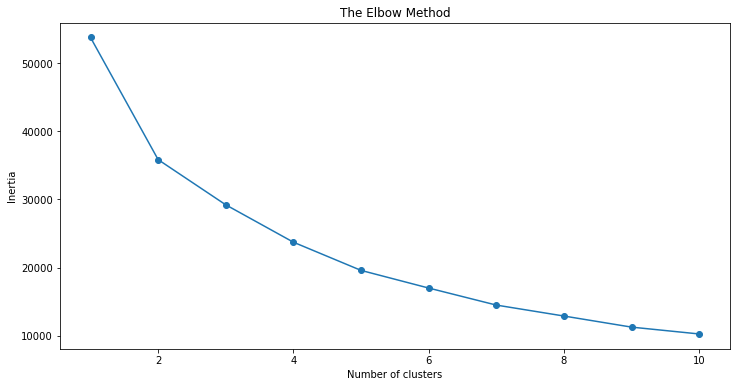

In [90]:
# Fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(products_scaled)
    SSE.append(kmeans.inertia_)

# Converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,11), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method');

In [91]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 3, init='k-means++')
kmeans.fit(products_scaled)
pred = kmeans.predict(products_scaled)

In [92]:
frame = pd.DataFrame(products_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

2    4025
0    3525
1    3205
Name: cluster, dtype: int64

In [93]:
frame

,0,1,2,3,4,cluster
0,0.139426,2.031300,1.887217,-0.448940,0.435345,2
1,0.419874,1.984221,1.886667,-0.448715,0.847142,2
2,0.057035,2.075017,2.040609,-0.447880,0.510217,2
3,0.131504,2.025247,1.939601,-0.448487,0.585089,2
4,0.484837,1.925709,1.878442,-0.448454,0.884578,2
...,...,...,...,...,...,...
10750,-0.084378,0.166297,0.883085,-0.263269,0.781629,2
10751,-0.205390,-0.024709,0.577973,-0.263091,0.692718,1
10752,-0.351160,-1.012024,-1.177836,-0.461378,0.182651,0
10753,4.795140,-0.819000,-0.793525,-0.472808,1.600544,1


In [94]:
frame_2 = pd.DataFrame(products)
frame_2['cluster'] = pred
frame_2['cluster'].value_counts()

2    4025
0    3525
1    3205
Name: cluster, dtype: int64

In [95]:
frame_2

,avg_month_cust,avg_discount_rate,discount_freq,prod_unit_price,avg_month_tran,cluster
prod_id,,,,,,
145519008,122.000000,0.4601,0.893112,0.706300,21.000000,2
145519009,181.000000,0.4531,0.892962,0.708400,24.666667,2
145519010,104.666667,0.4666,0.934844,0.716220,21.666667,2
145519011,120.333333,0.4592,0.907363,0.710534,22.333333,2
145519012,194.666667,0.4444,0.890724,0.710840,25.000000,2
...,...,...,...,...,...,...
999999154,74.916667,0.1828,0.619923,2.443613,24.083333,2
999999155,49.458333,0.1544,0.536913,2.445278,23.291667,1
999999193,18.791667,0.0076,0.059219,0.589919,18.750000,0


In [96]:
frame_2.groupby('cluster').describe().T

cluster                            0            1            2
avg_month_cust    count  3525.000000  3205.000000  4025.000000
                  mean     24.104534   215.561407    54.857071
                  std      29.947276   343.628620    76.877662
                  min       1.045455    13.791667     1.500000
                  25%       9.578947    62.000000    14.666667
                  50%      17.500000   110.411765    31.000000
                  75%      29.125000   208.416667    62.571429
                  max     596.250000  5867.791667   945.700000
avg_discount_rate count  3525.000000  3205.000000  4025.000000
                  mean      0.053629     0.064684     0.323908
                  std       0.053663     0.065452     0.095623
                  min       0.000000     0.000000     0.050000
                  25%       0.007800     0.010700     0.246100
                  50%       0.033600     0.042700     0.331800
                  75%       0.088600     0.098200     0.394200
                  max       0.265900     0.404800     0.689500
discount_freq     count  3525.000000  3205.000000  4025.000000
                  mean      0.183263     0.226717     0.673462
                  std       0.145324     0.175230     0.126996
                  min       0.000000     0.000000     0.125000
                  25%       0.054054     0.068966     0.581197
                  50%       0.144981     0.184333     0.673745
                  75%       0.300000     0.350195     0.758144
                  max       0.607477     0.823832     1.000000
prod_unit_price   count  3525.000000  3205.000000  4025.000000
                  mean      4.947907     1.864096     7.294158
                  std       6.244264     1.870503    13.564445
                  min       0.110000     0.065871     0.155958
                  25%       1.861607     0.790000     2.216052
                  50%       3.133621     1.378595     3.907254
                  75%       5.981030     2.025634     7.855546
                  max     159.000000    14.987761   399.000000
avg_month_tran    count  3525.000000  3205.000000  4025.000000
                  mean     11.935457    27.973507    13.027934
                  std       5.271211     3.184060     6.736064
                  min       1.142857    11.000000     1.250000
                  25%       7.666667    25.458333     7.625000
                  50%      11.800000    28.875000    11.916667
                  75%      16.333333    30.916667    17.500000
                  max      25.375000    31.444444    31.500000

# Centroids Position

In [97]:
centroids = pd.DataFrame(kmeans.cluster_centers_)

centroids

,0,1,2,3,4
0,-0.325607,-0.704130,-0.724240,0.003767,-0.580898
1,0.584645,-0.626114,-0.559402,-0.325447,1.219151
2,-0.180188,1.114786,1.079302,0.255701,-0.461623


In [98]:
StdScaler = StandardScaler()

centroids_scaled = StdScaler.fit_transform(centroids)

centroids_frame = pd.DataFrame(centroids_scaled)

centroids_frame.columns = products.columns.values[0:5]

centroids_frame

,avg_month_cust,avg_discount_rate,discount_freq,prod_unit_price,avg_month_tran
0,-0.881358,-0.753055,-0.805923,0.108257,-0.778427
1,1.398492,-0.660141,-0.603451,-1.275280,1.411729
2,-0.517134,1.413196,1.409374,1.167022,-0.633303


([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

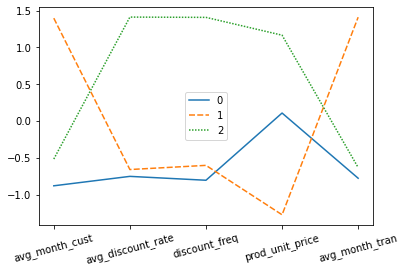

In [99]:
sns.lineplot(data = centroids_frame.T)
plt.xticks(rotation=15)

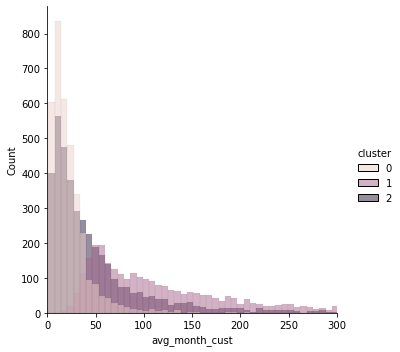

In [111]:
g = sns.displot(data = products, x = "avg_month_cust", hue = "cluster")
g.set(xlim=(0, 300))

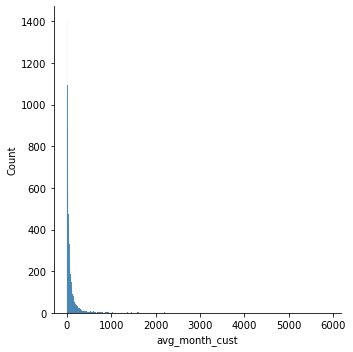

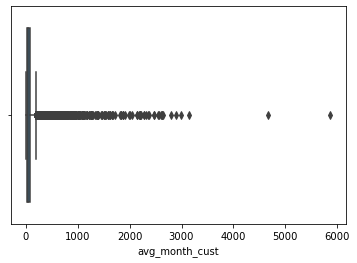

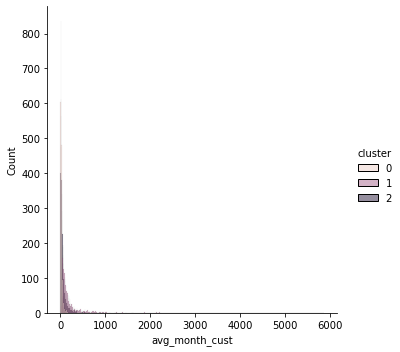

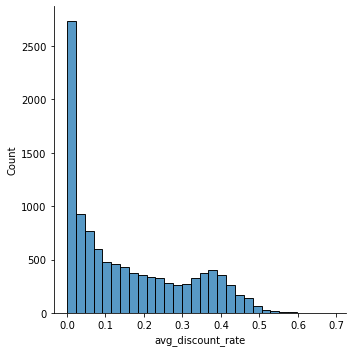

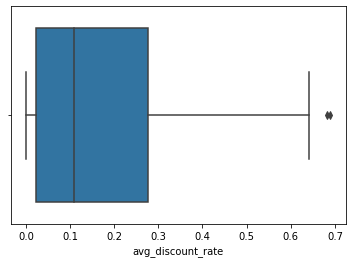

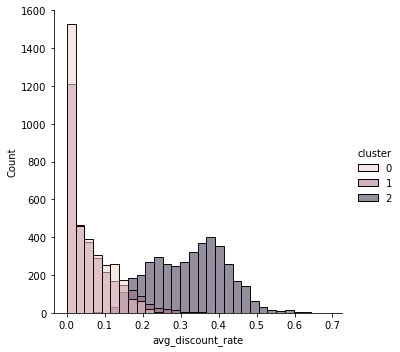

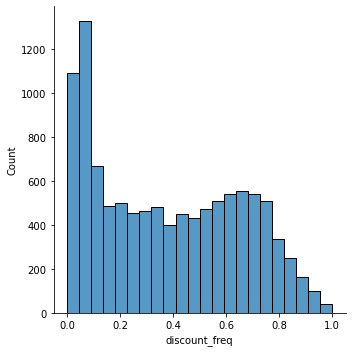

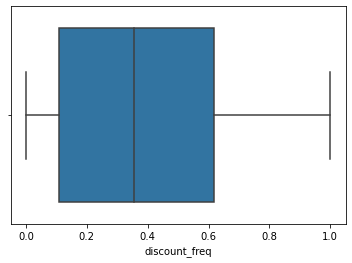

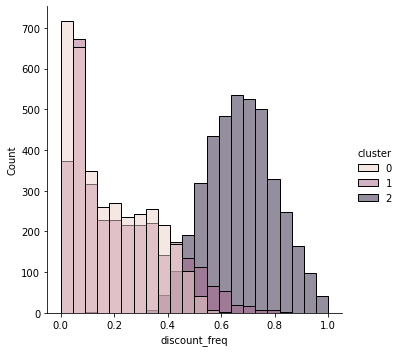

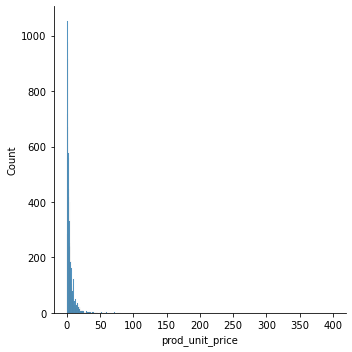

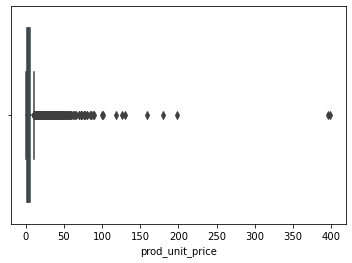

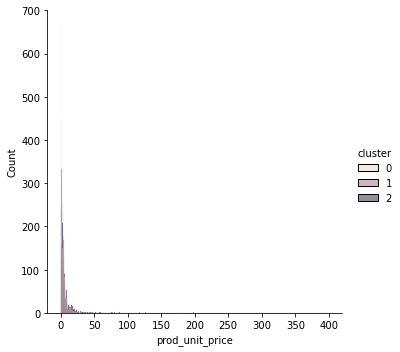

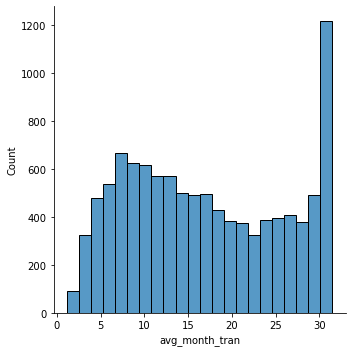

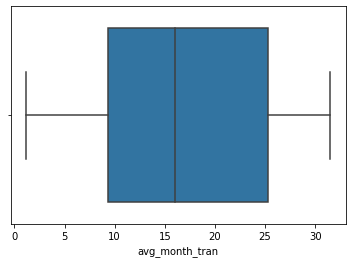

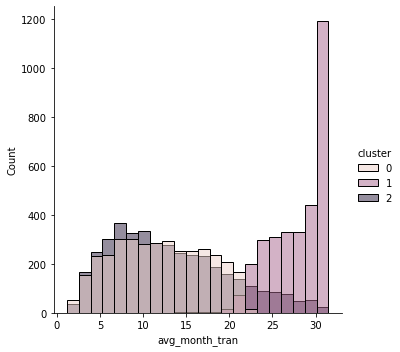

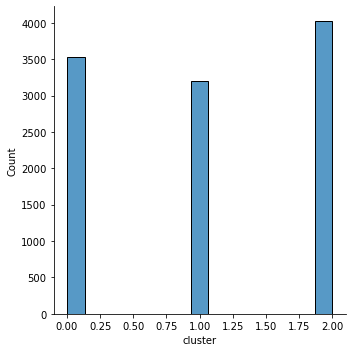

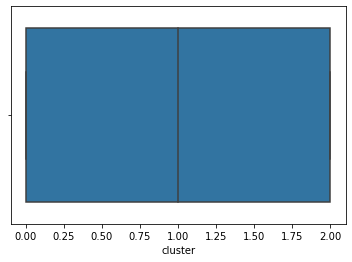

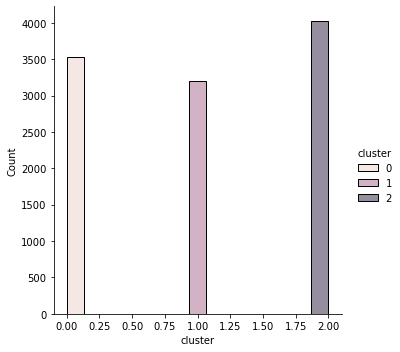

In [110]:
g = sns.displot(data = products, x = "avg_month_cust", hue = "cluster")
g.set(xlim=(0, 300))

In [113]:
products.describe()

,avg_month_cust,avg_discount_rate,discount_freq,prod_unit_price,avg_month_tran,cluster
count,10755.000000,10755.000000,10755.000000,10755.000000,10755.000000,10755.000000
mean,92.667829,0.158074,0.379667,4.907000,17.123664,1.046490
std,210.387457,0.148693,0.272077,9.357372,8.904469,0.836602
min,1.045455,0.000000,0.000000,0.065871,1.142857,0.000000
25%,15.800000,0.022200,0.109300,1.438987,9.375000,0.000000
50%,36.750000,0.108300,0.355304,2.658716,16.045455,1.000000
75%,87.979167,0.277200,0.619048,5.281273,25.324561,2.000000
max,5867.791667,0.689500,1.000000,399.000000,31.500000,2.000000
